# Multi-Layer Perceptron (scikit-learn)

We have learned how single neuron model works and how it is applied to the classify a simple dataset. In general, a single neuron model can be considered as a linear regression. For such problem, it will always yield a deterministic solution. With the help of activation function, it may gain some capability to simulate the non-linear behavior. However, one could not go quite far with one neuron. The beauty of neuron network is that we can always increase the number of neurons and build up more complicated archetecture to simulate more complicated problem.

<img src="img/nn.png" style="width: 500px;"/>
<center> Figure 1, Multiple neurons model</center>

In this lecture, we are going to learn how to build and apply the Multi-Layer models to . Specifically, we will learn the following aspects.
- Understand the principles of multi-layer perceptron (MLP) model
- build the MLP model based on scikit learn
- preprocess the data
- choose the right parameters
- analyze the output 

## Step 1: Choose your dataset
Sklearn provides many interesting dataset for different classes of problems. Here we choose the wine dataset, which is suitable for the classification problem

In [10]:
from sklearn.datasets import load_wine
from pprint import pprint
data=load_wine()
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## what can we learn from this dataset description?
- Number of samples: 178 
- x: 13 attributes (denoting Alchol, malic acid, .etc) with different variance
- Y: 3 classes

In [48]:
print('--------first sample')
print('x',x[0])
print('Y',Y[0])

--------first sample
x [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Y 0


## Step 2: Build the MLP model and run

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(hidden_layer_sizes=(4,2))
clf.fit(x, Y)
print('The final {:12s} is {:6.4f} after {:4d} iterations'.format(clf.loss, clf.loss_, clf.n_iter_))
print('The target y values')
print(Y)
print('The predicted y values')
print(clf.predict(x))
print('The trained accuracy is {:6.4f}'.format(accuracy_score(clf.predict(x), Y)))

The final log_loss     is 15.3937 after   12 iterations
The target y values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
The predicted y values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The trained accuracy is 0.3315


## Step 3: Trouble shooting
- the attributes in x has different variances (do we need to scale them?)
- too few neurons or two few hidden layers
- no enough iterations

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(x)  
x0 = scaler.transform(x) 
print('sample 1 before scaling')
print(x[0])
print('sample 1 before scaling')
print(x0[0])

sample 1 before scaling
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
sample 1 before scaling
[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
  1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
  1.01300893]


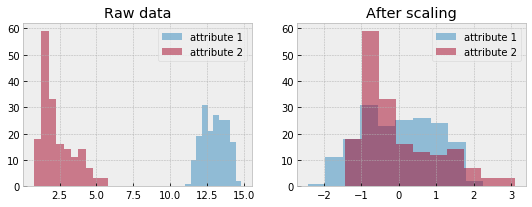

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use("bmh")

fig = plt.figure(figsize=(9,3))
gs=GridSpec(1,2)
ax1=fig.add_subplot(gs[0,0])                 
ax1.hist(x[:,0], bins=10, alpha=0.5, label='attribute 1')
ax1.hist(x[:,1], bins=10, alpha=0.5, label='attribute 2')
ax1.set_title('Raw data')
ax1.legend()

ax2=fig.add_subplot(gs[0,1])                 
ax2.hist(x0[:,0], bins=10, alpha=0.5, label='attribute 1')
ax2.hist(x0[:,1], bins=10, alpha=0.5, label='attribute 2')
ax2.legend()
ax2.set_title('After scaling')
plt.show()

## Step 4: Worked example

In [97]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(x)  
x0 = scaler.transform(x) 
clf = MLPClassifier(hidden_layer_sizes=(4,2), max_iter=5000)
clf.fit(x0, Y)
print('The final {:12s} is {:6.4f} after {:4d} iterations'.format(clf.loss, clf.loss_, clf.n_iter_))
print('The trained accuracy is {:6.4f}'.format(accuracy_score(clf.predict(x0), Y)))

The final log_loss     is 0.1461 after 2535 iterations
The trained accuracy is 1.0000


In [108]:
## Step 5: Understanding the trained parameters

In [94]:
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

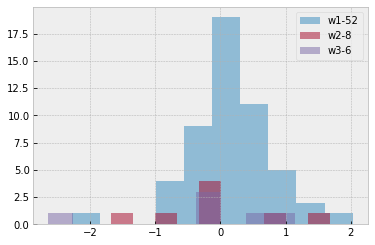

In [107]:
w1 = clf.coefs_[0].flatten()
w2 = clf.coefs_[1].flatten()
w3 = clf.coefs_[2].flatten()

plt.hist(w1, alpha=0.5, label='w1-'+str(len(w1)))
plt.hist(w2, alpha=0.5, label='w2-'+str(len(w2)))
plt.hist(w3, alpha=0.5, label='w3-'+str(len(w3)))
plt.legend()
plt.show()

In [109]:
clf.intercepts_

[array([-0.27316981,  1.28524131, -0.55911611,  0.94104913]),
 array([ 0.71522311, -0.4423628 ]),
 array([-2.31007638,  0.21615526,  1.54524162])]